In [32]:
from monai.utils import first
from monai.transforms import (
    LoadImaged,
    Compose,
    AddChanneld,
    ToTensord,
    Spacingd,
    ScaleIntensityRanged,
)


from monai.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import os
import torch

In [3]:
data_dir = 'D:/3_Stage/ALL_THE_DATA/fixed_data_03_august/all_together'

In [9]:
train_images = sorted(glob.glob(os.path.join(data_dir, "TrainData", "*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "TrainLabels", "*.nii.gz")))

val_images = sorted(glob.glob(os.path.join(data_dir, "ValData", "*.nii.gz")))
val_labels = sorted(glob.glob(os.path.join(data_dir, "ValLabels", "*.nii.gz")))

train_files = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
val_files = [{"image": image_name, "label": label_name} for image_name, label_name in zip(val_images, val_labels)]

In [33]:
orig_transform = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        AddChanneld(keys=["image", "label"]),
        ToTensord(keys=["image", "label"]),
    ]
)

train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        AddChanneld(keys=["image", "label"]),
        Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 2.0)),
        ScaleIntensityRanged(keys=["image"], a_min=-200, a_max=200,b_min=0.0, b_max=1.0, clip=True,), 
        ToTensord(keys=["image", "label"]),
    ]
)

val_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        AddChanneld(keys=["image", "label"]),
        ToTensord(keys=["image", "label"]),
    ]
)

In [38]:
orig_ds = Dataset(data=train_files, transform=orig_transform)
orig_loader = DataLoader(orig_ds, batch_size=1)

train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

val_ds = Dataset(data=val_files, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=1)

orig_patient = first(orig_loader)
train_patient = first(train_loader)
val_patient = first(val_loader)



tensor(-3024.)
tensor(1949.)


In [39]:
print(torch.min(orig_patient["image"]))
print(torch.max(orig_patient["image"]))

tensor(-3024.)
tensor(1949.)


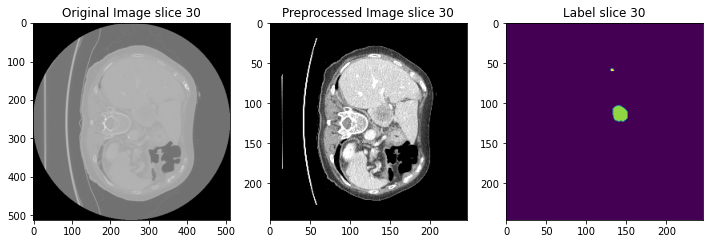

In [35]:
number_slice = 30

plt.figure("check", (12, 6))
plt.subplot(1, 3, 1)
plt.title(f"Original Image slice {number_slice}")
plt.imshow(orig_patient["image"][0, 0, :, :, number_slice], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(f"Preprocessed Image slice {number_slice}")
plt.imshow(train_patient["image"][0, 0, :, :, number_slice], cmap="gray")
plt.subplot(1, 3, 3)
plt.title(f"Label slice {number_slice}")
plt.imshow(train_patient["label"][0, 0, :, :, number_slice])
plt.show()